In [49]:
import pandas as pd
from sklearn import svm
import numpy as np

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, recall_score, roc_auc_score

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report  
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC

import seaborn as sns

# Baseline Модель

## Визуал

In [3]:
merged_df = pd.read_csv('merged_data.csv', sep=',')

####

In [3]:
merged_df[['year', 'month', 'day', 'visit_date']]

,year,month,day,visit_date
0,2021,12,23,2021-12-23
1,2021,12,23,2021-12-23
2,2021,12,23,2021-12-23
3,2021,12,23,2021-12-23
4,2021,12,23,2021-12-23
...,...,...,...,...
11966281,2021,11,13,2021-11-13
11966282,2021,11,13,2021-11-13
11966283,2021,11,13,2021-11-13
11966284,2021,11,13,2021-11-13


In [4]:
merged_df = merged_df.drop(['visit_date'], axis=1)

In [5]:
merged_df= merged_df.drop(['hit_referer'], axis=1)

In [10]:
merged_df[merged_df.isna().any(axis=1)]

,session_id,hit_number,hit_page_path,event_label,year,month,day,event_categories_markup,client_id,visit_time,screen_width,screen_height,utm_source_encoded,utm_medium_encoded,utm_campaign_encoded,device_category_encoded,device_brand_encoded,device_browser_encoded,geo_country_encoded
18,1187487192585096450.1640259719.1640259734,44,client.sap.sberauto-team.com/cars/all/volkswag...,cMCEFfSnnlNHXnIdruks,2021,12,23,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
173,3643304133287772168.1640273158.1640273166,7,client.saptest.sberauto-team.com/cars?city=1&r...,hAHqGICPFQiPwtzubOzs,2021,12,23,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
508,1187487192585096450.1640263335.1640263335,17,client.sap.sberauto-team.com/cars?utm_content_...,hAHqGICPFQiPwtzubOzs,2021,12,23,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
524,1187487192585096450.1640259719.1640259734,8,client.sap.sberauto-team.com/cars?utm_content_...,hAHqGICPFQiPwtzubOzs,2021,12,23,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
546,3643304133287772168.1640268382.1640268391,10,client.sap.sberauto-team.com/cars?city=1&renta...,exyNyRcKbRJNDavyEYoX,2021,12,23,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11957236,1187487192585096450.1638872185.1638872185,13,client.saptest.sberauto-team.com/cars?utm_cont...,hAHqGICPFQiPwtzubOzs,2021,12,7,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11957273,2463753728364584753.1638871416.1638871416,13,sberauto.com/cars/nissan?rental_car=rental_onl...,kLQDjbTrexjKfprxZDyH,2021,12,7,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11957635,1187487192585096450.1638871937.1638871980,15,client.saptest.sberauto-team.com/cars/all/niss...,laGwZrsmhPBUTfmuxIBJ,2021,12,7,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11957652,9133660930566549352.1638862122.1638862220,15,client.degipti.sberauto-team.com/cars?city=1&r...,IVnHYBjOnVYVppvrUpwj,2021,12,7,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# так как относительно общего датасета(13млн) 8 тысяч незначительны, а также в этих 8 тысячах много сразу 
# несколько колонок с пропущенными значениям, поэтому на начальном этапе удаляем все такие строки
merged_df = merged_df.dropna()

## Разработка

In [7]:
x = merged_df.drop(['event_categories_markup', 'visit_time', 'session_id', 'hit_page_path', 'event_label', 'client_id'], axis=1)
y = merged_df.event_categories_markup
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape

((9566029, 14), (2391508, 14))

### Обучим логистическую регрессию

In [8]:
model = LogisticRegression(class_weight='balanced')

model.fit(x_train, y_train)

LogisticRegression(class_weight='balanced')

In [9]:
pred = model.predict(x_test)

pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [10]:
y_test[:10].values

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [71]:
accuracy_score(y_test, pred)

0.6758475065


### k-ближайших соседей и опорных векторов

In [20]:
'''SVC_model = svm.SVC()  
# В KNN-модели нужно указать параметр n_neighbors
# Это число точек, на которое будет смотреть 
# классификатор, чтобы определить, к какому классу принадлежит новая точка
KNN_model = KNeighborsClassifier(n_neighbors=5)'''

In [21]:
'''x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.05, random_state=42)
x_train.shape, x_test.shape'''

((11359660, 13), (597877, 13))

In [22]:
#SVC_model.fit(x_train, y_train) 
#SVC_prediction = SVC_model.predict(x_test) 

In [23]:
#KNN_model.fit(x_train, y_train)
#KNN_prediction = KNN_model.predict(x_test)

In [24]:
# Оценка точности — простейший вариант оценки работы классификатора
#print(accuracy_score(SVC_prediction, y_test))  
#print(accuracy_score(KNN_prediction, y_test))  
# Но матрица неточности и отчёт о классификации дадут больше информации о производительности
#print(confusion_matrix(SVC_prediction, y_test))  
#print(classification_report(KNN_prediction, y_test))

## Обработка выбросов

In [25]:
merged_df.describe().round(2)

,hit_number,year,month,day,event_categories_markup,client_id,screen_width,screen_height,utm_source_encoded,utm_medium_encoded,utm_campaign_encoded,device_category_encoded,device_brand_encoded,device_browser_encoded,geo_country_encoded
count,11957537.00,11957537.0,11957537.00,11957537.00,11957537.00,1.195754e+07,11957537.00,11957537.00,1.195754e+07,11957537.00,1.195754e+07,11957537.00,11957537.00,11957537.0,11957537.00
mean,23.52,2021.0,8.55,17.12,0.17,1.074791e+09,726.83,860.44,1.659553e+04,11907.39,3.685471e+05,3.65,1741.51,50.3,2691.31
std,28.29,0.0,2.23,8.79,0.38,6.198305e+08,603.42,152.52,8.111038e+05,31426.36,4.120941e+06,4.41,78807.74,371.4,100231.88
min,1.00,2021.0,5.00,1.00,0.00,2.321600e+02,0.00,0.00,1.000000e+00,1.00,1.000000e+00,1.00,1.00,1.0,1.00
25%,8.00,2021.0,7.00,10.00,0.00,5.402154e+08,375.00,780.00,1.000000e+00,1.00,1.010000e+02,1.00,11.00,1.0,1.00
50%,15.00,2021.0,9.00,18.00,0.00,1.075179e+09,412.00,851.00,1.010000e+02,11.00,1.010000e+02,1.00,100.00,1.0,1.00
75%,29.00,2021.0,10.00,25.00,0.00,1.611918e+09,962.00,900.00,1.000000e+03,1001.00,1.001000e+04,11.00,110.00,11.0,1.00
max,500.00,2021.0,12.00,31.00,1.00,2.147483e+09,5924.00,20000.00,1.010011e+08,110110.00,1.101100e+08,11.00,11001101.00,111001.0,10100110.00


In [12]:
# заметим, что все данные с 2021 года, следовательно этот столбец можно удалить
merged_df = merged_df.drop(['year'], axis=1)

hit_number, screen_width, screen_height, device_brand_encode, device_browser_encoded, geo_country_encoded имеют редкие значения помещенные в max

### Проанализируем графики

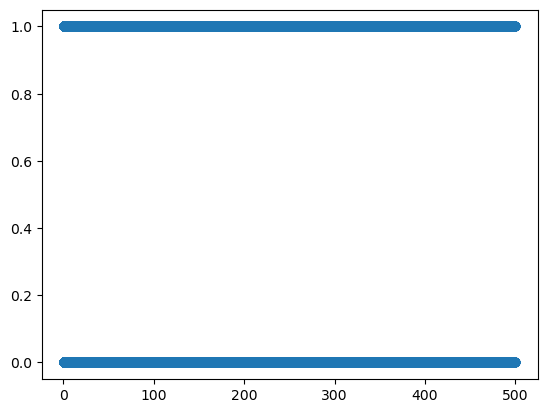

In [28]:
from matplotlib import pyplot as plt

plt.scatter(merged_df['hit_number'], merged_df['event_categories_markup'])

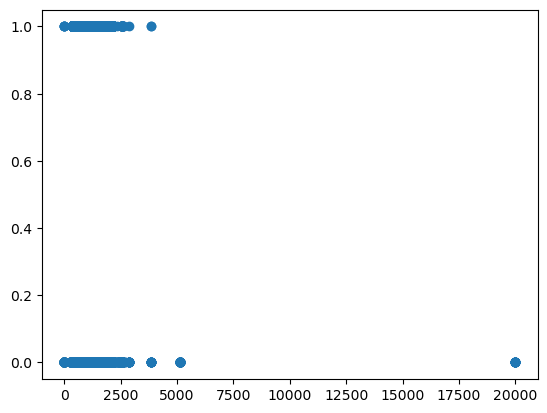

In [29]:
plt.scatter(merged_df['screen_height'], merged_df['event_categories_markup'])

In [13]:
# Удаление выбросов с помощью квантилей

# Вычисление IQR
Q1 = merged_df['screen_height'].quantile(0.25)
Q3 = merged_df['screen_height'].quantile(0.75)
IQR = Q3 - Q1

# Определение границ
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Удаление выбросов
df_no_outliers = merged_df[(merged_df['screen_height'] >= lower_bound) & (merged_df['screen_height'] <= upper_bound)]


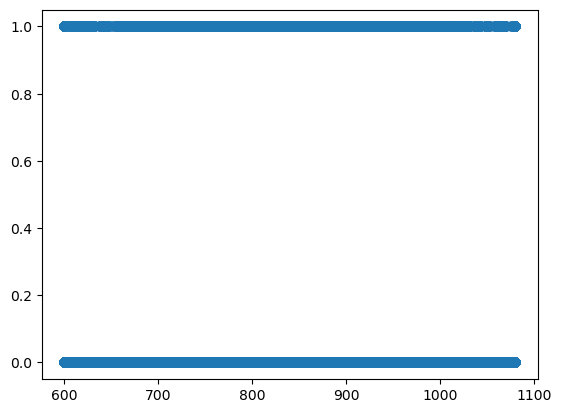

In [31]:
plt.scatter(df_no_outliers['screen_height'], df_no_outliers['event_categories_markup'])

In [32]:
merged_df2 = df_no_outliers

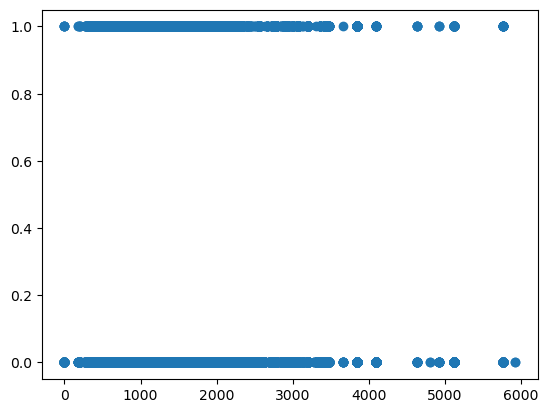

In [33]:
plt.scatter(merged_df['screen_width'], merged_df['event_categories_markup'])

In [15]:
# Удаление выбросов с помощью квантилей
column = 'screen_width'
# Вычисление IQR
Q1 = merged_df[column].quantile(0.25)
Q3 = merged_df[column].quantile(0.75)
IQR = Q3 - Q1

# Определение границ
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Удаление выбросов
df_no_outliers = merged_df[(merged_df[column] >= lower_bound) & (merged_df[column] <= upper_bound)]


In [ ]:
plt.scatter(df_no_outliers['screen_width'], df_no_outliers['event_categories_markup'])

In [35]:
merged_df2 = df_no_outliers

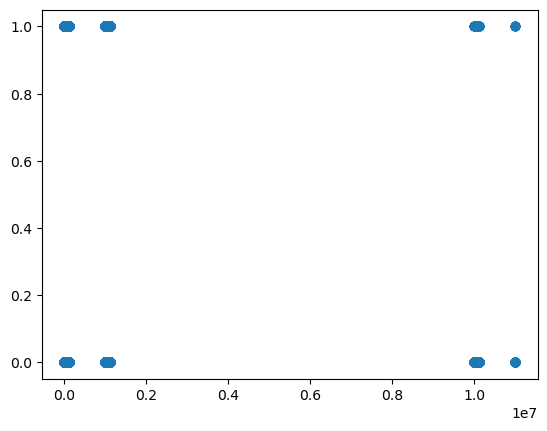

In [36]:
plt.scatter(merged_df['device_brand_encoded'], merged_df['event_categories_markup'])

# Улучшение модели: Feature Engineering

## Построим графики

In [18]:
merged_df2 = merged_df.drop(['visit_time', 'client_id', 'session_id', 'hit_page_path', 'event_label'], axis=1)

### Преобразование закодированных столбцов

In [43]:
merged_df2.head(1)

,hit_number,month,day,event_categories_markup,screen_width,screen_height,utm_source_encoded,utm_medium_encoded,utm_campaign_encoded,device_category_encoded,device_brand_encoded,device_browser_encoded,geo_country_encoded
0,11,12,23,0,393.0,873.0,1.0,1.0,1.0,1.0,11.0,1.0,1.0


In [21]:
def unencoded(merged_df2, count):
    # Преобразование двоичных строк в десятичные числа
    merged_df2[count] = merged_df2[count].astype(str)
    # Удаление последних 2 символов из строк в столбце
    merged_df2[count] = merged_df2[count].str[:-2]

    merged_df2[count] = merged_df2[count].apply(lambda x: int(x, 2))
    return merged_df2
merged_df2 = unencoded(merged_df2, 'device_brand_encoded')

In [22]:
merged_df2['device_brand_encoded'].value_counts()

device_brand_encoded
4      3645304
6      3073234
2      1944797
3      1529696
1      1041269
        ...   
183          1
120          1
192          1
174          1
142          1
Name: count, Length: 187, dtype: int64

In [23]:
merged_df2 = unencoded(merged_df2, 'device_category_encoded')
merged_df2['device_category_encoded'].value_counts()

device_category_encoded
1    8772143
3    3072600
2     112794
Name: count, dtype: int64

In [24]:
merged_df2 = unencoded(merged_df2, 'utm_campaign_encoded')
merged_df2['utm_campaign_encoded'].value_counts()

utm_campaign_encoded
5      4413170
1      2174388
6       986993
2       437219
26      138066
        ...   
407          1
417          1
432          1
309          1
369          1
Name: count, Length: 402, dtype: int64

In [19]:
# Преобразование двоичных строк в десятичные числа
merged_df2['geo_country_encoded'] = merged_df2['geo_country_encoded'].astype(str)
# Удаление последних 2 символов из строк в столбце
merged_df2['geo_country_encoded'] = merged_df2['geo_country_encoded'].str[:-2]

merged_df2['geo_country_encoded'] = merged_df2['geo_country_encoded'].apply(lambda x: int(x, 2))
merged_df2.geo_country_encoded.value_counts()

geo_country_encoded
1      11637326
3         60265
5         25166
2         23573
21        20392
         ...   
149           3
128           2
166           2
122           1
141           1
Name: count, Length: 155, dtype: int64

In [20]:
count = 'device_browser_encoded'
# Преобразование двоичных строк в десятичные числа
merged_df2[count] = merged_df2[count].astype(str)
# Удаление последних 2 символов из строк в столбце
merged_df2[count] = merged_df2[count].str[:-2]

merged_df2[count] = merged_df2[count].apply(lambda x: int(x, 2))
merged_df2[count].value_counts()

device_browser_encoded
1     6146733
3     3212949
4     1027208
6      534944
5      357488
2      199620
8      162769
7      162312
9      146976
14       3537
13        531
23        530
11        363
15        311
26        266
12        240
25        159
27        115
30         89
29         58
16         52
24         42
17         37
18         28
35         21
36         18
28         18
21         16
31         16
37         14
19         13
38         12
45         12
34          6
42          6
41          5
54          4
43          3
49          3
39          2
56          2
47          2
33          2
10          2
57          1
40          1
46          1
Name: count, dtype: int64

In [25]:
merged_df2 = unencoded(merged_df2, 'utm_source_encoded')
merged_df2['utm_source_encoded'].value_counts()

utm_source_encoded
1      3716399
5      2775883
3      1342596
18     1176357
8       934070
        ...   
119          1
247          1
260          1
244          1
194          1
Name: count, Length: 274, dtype: int64

In [26]:
merged_df2 = unencoded(merged_df2, 'utm_medium_encoded')
merged_df2['utm_medium_encoded'].value_counts()

utm_medium_encoded
1     3632413
3     2423718
7     1719316
4      536162
2      481370
22     219195
13     197875
16     146789
14     120081
38      85734
21      82674
27      76018
8       72878
32      71133
18      58179
39      55829
12      55825
34      54932
31      53946
15      53348
30      53319
52      53203
43      53097
19      52970
41      52707
26      52700
51      52659
47      52608
44      52474
46      52370
10      52360
45      52358
42      52155
6       52133
28      51988
17      51958
23      51826
24      51786
53      51696
9       51684
29      51500
36      51490
54      51458
37      51435
25      51352
35      51220
40      51023
33      50950
49      50764
50      50686
20      50560
48      50230
11      49927
5       49476
Name: count, dtype: int64

## Еще раз построим графики

hit_number


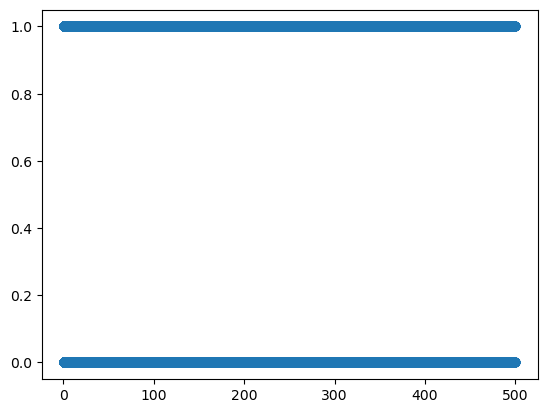

month


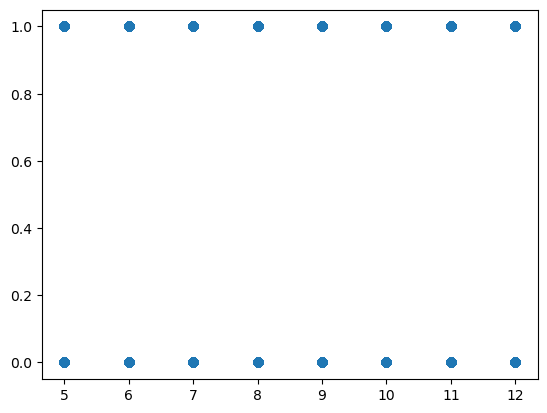

day


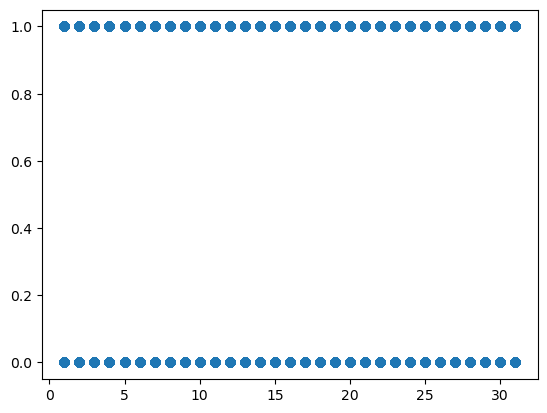

event_categories_markup


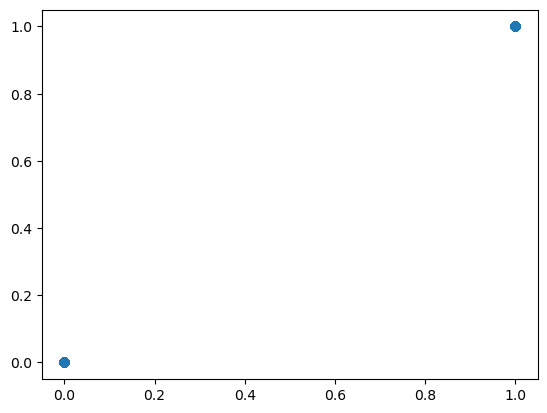

screen_width


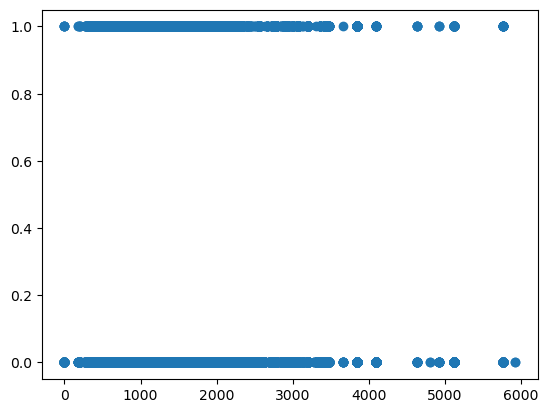

screen_height


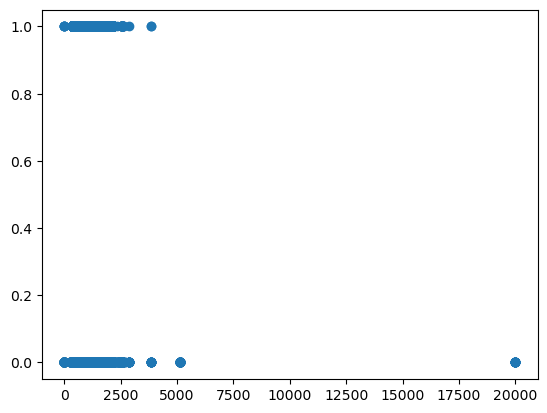

utm_source_encoded


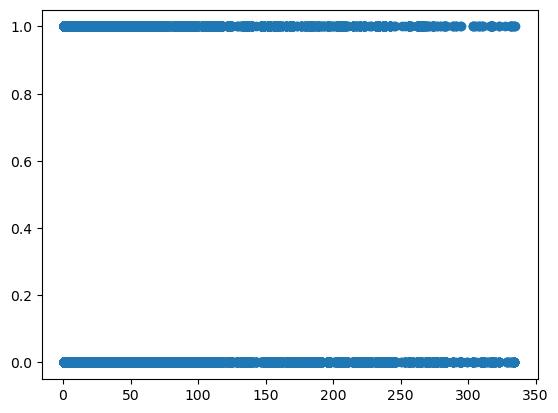

utm_medium_encoded


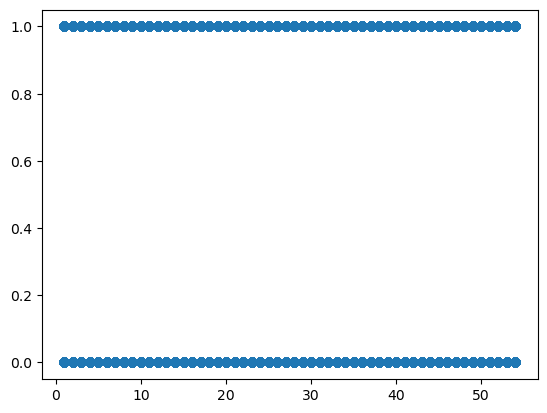

utm_campaign_encoded


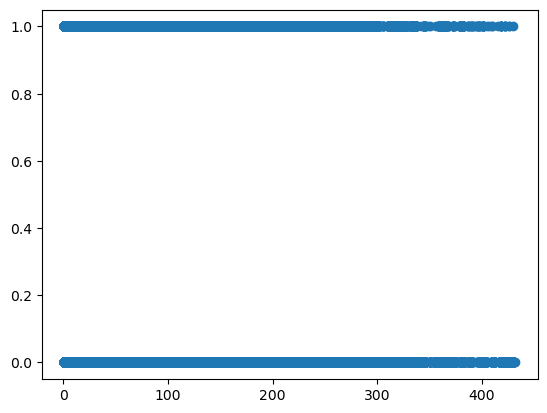

device_category_encoded


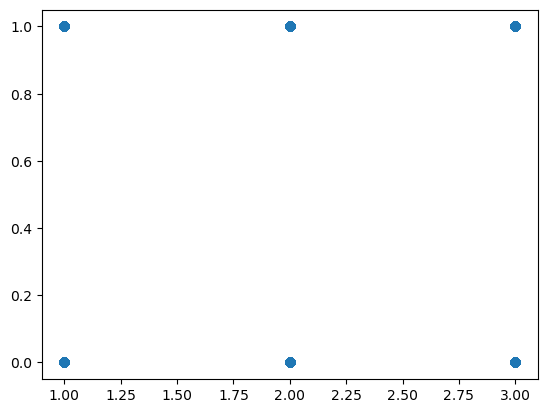

device_brand_encoded


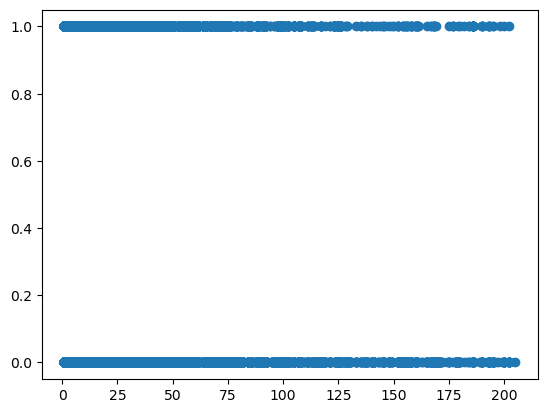

device_browser_encoded


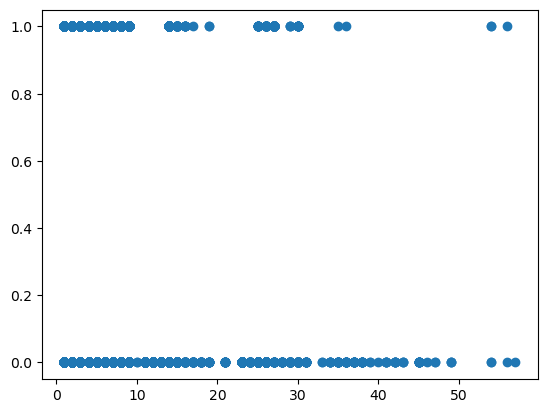

geo_country_encoded


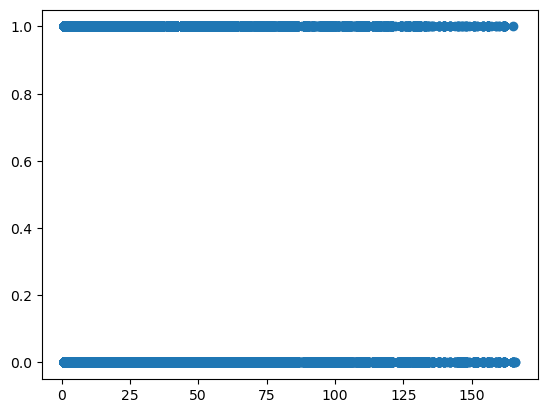

In [52]:
for c in merged_df2.columns:
    print(c)
    plt.scatter(merged_df2[c], merged_df2['event_categories_markup'])
    plt.show()

<Axes: >

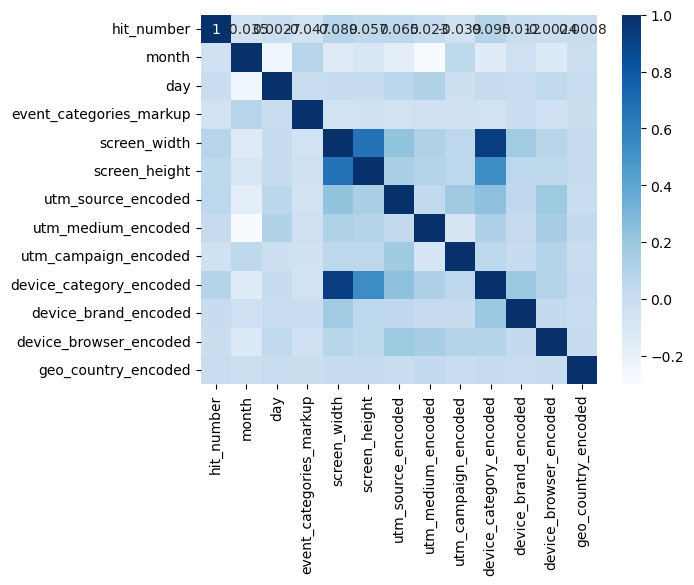

In [57]:
corr = merged_df2.corr() # матрица корреляций

sns.heatmap(corr, cmap="Blues", annot=True)

<Axes: >

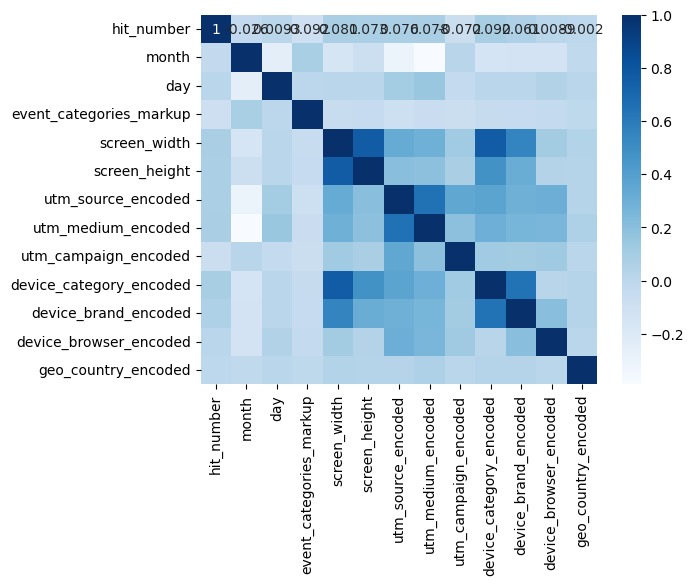

In [59]:
corr = merged_df2.corr(method='spearman') # матрица корреляций

sns.heatmap(corr, cmap="Blues", annot=True)

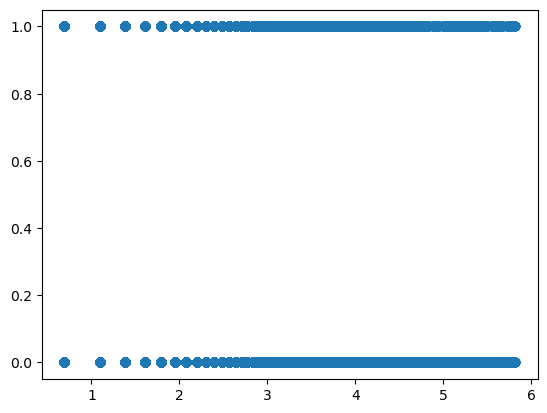

In [60]:
plt.scatter(np.log1p(merged_df2['utm_source_encoded']), merged_df2['event_categories_markup'])

In [71]:
def get_dependency(column):
    # Рассчитываем коэффициенты корреляции
    corr_coef = np.corrcoef(merged_df2[column], merged_df2['event_categories_markup'])[0][1]
    corr_coef_sqrt = np.corrcoef(merged_df2[column] ** 0.5, merged_df2['event_categories_markup'])[0][1]
    corr_coef_log = np.corrcoef(np.log1p(merged_df2[column]), merged_df2['event_categories_markup'])[0][1]
    
    # Выводим только положительные коэффициенты корреляции
    if corr_coef > 0:
        print(f'Коэффициент корреляции (без преобразований) для {column}: {corr_coef}')
    if corr_coef_sqrt > 0:
        print(f'Коэффициент корреляции (квадратный корень) для {column}: {corr_coef_sqrt}')
    if corr_coef_log > 0:
        print(f'Коэффициент корреляции (логарифм) для {column}: {corr_coef_log}')
        print('\n')
    

for c in merged_df2.columns:
    get_dependency(c)

Коэффициент корреляции (без преобразований) для month: 0.0859913041481743
Коэффициент корреляции (квадратный корень) для month: 0.08031065448278228
Коэффициент корреляции (логарифм) для month: 0.07578748657888962


Коэффициент корреляции (без преобразований) для day: 0.004682555005223445
Коэффициент корреляции (квадратный корень) для day: 0.004310918953382481
Коэффициент корреляции (логарифм) для day: 0.0039265416607190936


Коэффициент корреляции (без преобразований) для event_categories_markup: 1.0
Коэффициент корреляции (квадратный корень) для event_categories_markup: 1.0
Коэффициент корреляции (логарифм) для event_categories_markup: 0.999999999999841




In [34]:
merged_df2['log month'] = np.log1p(merged_df2['month'])
merged_df2['log day'] = np.log1p(merged_df2['day'])

merged_df2.drop(['month', 'day'], axis=1, inplace=True)

## Переобучим модель логистической регрессии

In [27]:
X_enc = merged_df2.drop(['event_categories_markup'], axis=1)
y_enc = merged_df2['event_categories_markup']

X_train_enc, X_test_enc, y_train_enc, y_test_enc = train_test_split(X_enc, y_enc, test_size=0.25, random_state=42)

In [28]:
model.fit(X_train_enc, y_train_enc)

pred_enc_clean = model.predict(X_test_enc)

In [75]:
coef = recall_score(y_test_enc, pred_enc_clean)
coef

0.82


## Шаг 2: изучение попарных зависимостей - полиномиальные признаки

### Решение проблемы с памятью

In [31]:
merged_df2.dtypes

hit_number                   int64
month                        int64
day                          int64
event_categories_markup      int64
screen_width               float64
screen_height              float64
utm_source_encoded           int64
utm_medium_encoded           int64
utm_campaign_encoded         int64
device_category_encoded      int64
device_brand_encoded         int64
device_browser_encoded       int64
geo_country_encoded          int64
geo_city_encoded           float64
dtype: object

In [32]:
merged_df2.describe()

,hit_number,month,day,event_categories_markup,screen_width,screen_height,utm_source_encoded,utm_medium_encoded,utm_campaign_encoded,device_category_encoded,device_brand_encoded,device_browser_encoded,geo_country_encoded,geo_city_encoded
count,1.195754e+07,1.195754e+07,1.195754e+07,1.195754e+07,1.195754e+07,1.195754e+07,1.195754e+07,1.195754e+07,1.195754e+07,1.195754e+07,1.195754e+07,1.195754e+07,1.195754e+07,1.195754e+07
mean,2.351770e+01,8.550724e+00,1.712492e+01,1.728980e-01,7.268277e+02,8.604403e+02,7.307740e+00,9.542452e+00,1.832164e+01,1.523351e+00,4.537403e+00,2.438587e+00,1.520494e+00,6.872766e+07
std,2.828606e+01,2.231042e+00,8.788297e+00,3.781591e-01,6.034200e+02,1.525225e+02,9.886622e+00,1.320530e+01,3.126485e+01,8.737124e-01,4.400620e+00,1.866218e+00,4.748644e+00,2.015965e+09
min,1.000000e+00,5.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,8.000000e+00,7.000000e+00,1.000000e+01,0.000000e+00,3.750000e+02,7.800000e+02,1.000000e+00,1.000000e+00,5.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00,1.000000e+01
50%,1.500000e+01,9.000000e+00,1.800000e+01,0.000000e+00,4.120000e+02,8.510000e+02,5.000000e+00,3.000000e+00,5.000000e+00,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,1.000000e+02
75%,2.900000e+01,1.000000e+01,2.500000e+01,0.000000e+00,9.620000e+02,9.000000e+02,8.000000e+00,9.000000e+00,1.800000e+01,3.000000e+00,6.000000e+00,3.000000e+00,1.000000e+00,1.101000e+04
max,5.000000e+02,1.200000e+01,3.100000e+01,1.000000e+00,5.924000e+03,2.000000e+04,3.350000e+02,5.400000e+01,4.320000e+02,3.000000e+00,2.050000e+02,5.700000e+01,1.660000e+02,1.001111e+11


In [35]:
merged_df2['hit_number'] = merged_df2['hit_number'].astype('int16')
merged_df2['event_categories_markup'] = merged_df2['event_categories_markup'].astype('int16')
merged_df2['utm_source_encoded'] = merged_df2['utm_source_encoded'].astype('int16')
merged_df2['utm_medium_encoded'] = merged_df2['utm_medium_encoded'].astype('int16')
merged_df2['utm_campaign_encoded'] = merged_df2['utm_campaign_encoded'].astype('int16')
merged_df2['device_category_encoded'] = merged_df2['device_category_encoded'].astype('int16')
merged_df2['device_brand_encoded'] = merged_df2['device_brand_encoded'].astype('int16')
merged_df2['device_browser_encoded'] = merged_df2['device_browser_encoded'].astype('int16')
merged_df2['geo_country_encoded'] = merged_df2['geo_country_encoded'].astype('int16')



merged_df2['screen_width'] = merged_df2['screen_width'].astype('float16')
merged_df2['screen_height'] = merged_df2['screen_height'].astype('float16')
merged_df2['log month'] = merged_df2['log month'].astype('float16')
merged_df2['log day'] = merged_df2['log day'].astype('float16')

### Полиномиальные признаки

In [40]:
# Добавим полиномиальных признаков степени 2 и 3

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler

model = LogisticRegression(class_weight='balanced')

pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2)),
    ('log_reg', model)
])

# Обучаем модель
pipeline.fit(X_train_enc, y_train_enc)

# Делаем предсказания
y_pred = pipeline.predict(X_test_enc)

In [81]:
pred_train = pipeline.predict(X_train_enc)


In [84]:
# Предсказания на обучающем наборе
pred_train = pipeline.predict(X_train_enc)
y_train_prob = pipeline.predict_proba(X_train_enc)[:, 1]  # Вероятности для ROC AUC

# Метрики для обучающей выборки
accuracy_train = accuracy_score(y_train_enc, pred_train)
roc_auc_train = roc_auc_score(y_train_enc, y_train_prob)


# Вывод метрик
print("Метрики на обучающем наборе:")
print("Accuracy:", accuracy_train)
print("ROC AUC:", roc_auc_train)

Метрики на обучающем наборе:
Accuracy: 0.8273216731869598
ROC AUC: 0.49055943179990125


## CatBoosting

In [69]:
from catboost import CatBoostClassifier

# Инициализация модели классификации
cb = CatBoostClassifier(n_estimators=10)

# Обучение модели
cb.fit(X_train_enc, y_train_enc)

# Предсказания
pred_train = cb.predict(X_train_enc)
y_pred = cb.predict(X_test_enc)

# Метрики
accuracy_train = accuracy_score(y_train_enc, pred_train)
accuracy_test = accuracy_score(y_test_enc, y_pred)

print("Accuracy на обучающей выборке:", accuracy_train)
print("Accuracy на тестовой выборке:", accuracy_test)


Learning rate set to 0.5
0:	learn: 0.4907231	total: 330ms	remaining: 2.97s
1:	learn: 0.4254708	total: 651ms	remaining: 2.6s
2:	learn: 0.3990413	total: 941ms	remaining: 2.19s
3:	learn: 0.3885402	total: 1.32s	remaining: 1.99s
4:	learn: 0.3844254	total: 1.64s	remaining: 1.64s
5:	learn: 0.3812683	total: 1.94s	remaining: 1.29s
6:	learn: 0.3798519	total: 2.31s	remaining: 992ms
7:	learn: 0.3784914	total: 2.65s	remaining: 662ms
8:	learn: 0.3772398	total: 3.01s	remaining: 335ms
9:	learn: 0.3765203	total: 3.33s	remaining: 0us
Accuracy на обучающей выборке: 0.8609118132698911
Accuracy на тестовой выборке: 0.8611510394278422


# Итоги

Логистическая регрессия показывает качество: **accuracy = 0.67**.

Были сделаны следующие шаги, каждый из которых улучшил качество:

1. **Бинарное кодирование** всех категориальных столбцов, чтобы их можно было использовать для обучения модели.

2. При поиске **выбросов** с помощью графиков было выявлено, что бинарное представление значений не позволяет проанализировать графики. Из-за этого пришлось **перекодировать** все значения с помощью **One-Hot кодирования**.

3. **Логарифмирование** нескольких признаков.

4. Переобучение модели логистической регрессии: **accuracy = 0.82**.

5. Добавление **полиномиальных признаков** степени 2 и 3 с последующей **регуляризацией**.

6. Использование **CatBoostClassifier**, получили точность:
   - Accuracy на обучающей выборке: **0.8609**
   - Accuracy на тестовой выборке: **0.8612**

## Итоговый результат: **Accuracy = 0.86**
